In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

In [2]:
bank_data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
bank_data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [5]:
bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
#Replacing the negative values for the variable Experience to the median value of experience
median_experience = bank_data['Experience'].median()
bank_data['Experience'].loc[bank_data['Experience'] < 0] = median_experience

In [7]:
#Confiring if the desred values changed
bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
#Number of null in each of the variable
bank_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
#Number of NAs
bank_data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
bank_data.shape

(5000, 14)

In [11]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   float64
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [12]:
#Number of unique values in the given variables
bank_data.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [13]:
#Number of customers with zero mortgage
bank_data['ID'].where(bank_data['Mortgage'] == 0).count()

3462

In [14]:
#Number of customers with zero spending on credit card
bank_data['ID'].where(bank_data['CCAvg'] == 0).count()

106

In [15]:
#Value counts of all categorical columns.
bank_data.loc[:,~bank_data.columns.isin(['ID','Income','CCAvg','Mortgage'])].nunique()

Age                    45
Experience             44
ZIP Code              467
Family                  4
Education               3
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

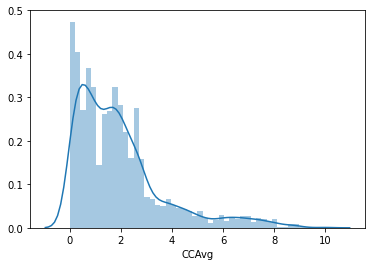

In [16]:
#Univariate and Bivariate
fig,ax = plt.subplots()
ax.set_ylim(0,0.5)
sns.distplot(bank_data['CCAvg'])

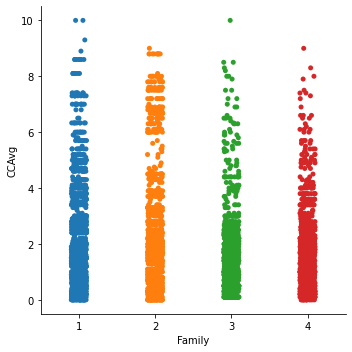

In [17]:
sns.catplot(y='CCAvg',x='Family',data=bank_data)

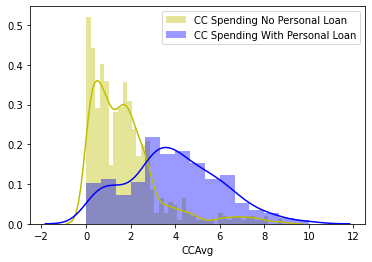

In [18]:
sns.distplot(bank_data[bank_data['Personal Loan']==0]['CCAvg'],color='y',label='CC Spending No Personal Loan')
sns.distplot(bank_data[bank_data['Personal Loan']==1]['CCAvg'],color='b',label='CC Spending With Personal Loan')
plt.legend()
plt.show()

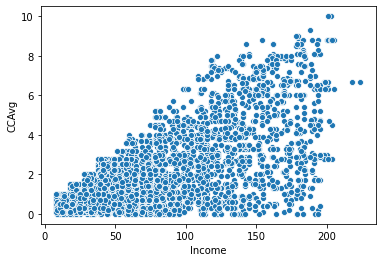

In [19]:
sns.scatterplot(x=bank_data['Income'],y=bank_data['CCAvg'],data=bank_data)

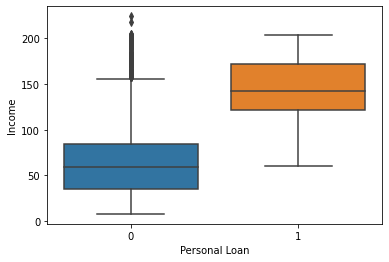

In [20]:
sns.boxplot(y=bank_data['Income'],x=bank_data['Personal Loan'],data=bank_data)

In [21]:
#Removing the irrelevant columns
bank_data.drop(columns=['ID','Age','ZIP Code'],axis=1,inplace=True)
bank_data.columns

Index(['Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [22]:
#creating dummy variables
bank_data_dummies = bank_data.copy()
#the dummy variables did not add anything substantial to the model's performance and hence it is not required
# for name in ['Education','Family']:
#    dummies = pd.get_dummies(prefix=name, columns=[name],data=bank_data,drop_first=True)
#    bank_data_dummies[dummies.columns] = dummies

In [23]:
#the following colummns didn't add value to the model's performance and hence has been removed
bank_data_dummies.drop(columns=['Family','Education','Online','CCAvg','Experience','Income','Mortgage','Personal Loan','Securities Account'],axis=1,inplace=True)

In [24]:
bank_data_dummies.columns

Index(['CD Account', 'CreditCard'], dtype='object')

In [25]:
x = bank_data_dummies.drop(columns='CreditCard',axis=1)
Y = bank_data_dummies['CreditCard']

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size=0.3,random_state=1)

In [27]:
model = LogisticRegression()

In [28]:
model.fit(x_train,y_train)
#predict on test
y_predict = model.predict(x_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

        0  intercept
0  2.3373  -1.021906


In [29]:
#Calculale the Accuracy of the model
metrics.accuracy_score(y_test,y_predict)

0.7453333333333333

array([[1053,   18],
       [ 364,   65]])

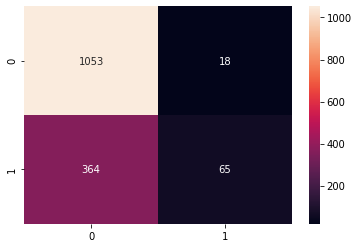

In [30]:
cm=metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True,fmt='g')
cm

In [31]:
auc = metrics.roc_auc_score(y_test,y_predict)
f1_score = metrics.f1_score(y_test,y_predict)
precision = metrics.precision_score(y_test,y_predict)
recall = metrics.recall_score(y_test,y_predict)
print(f"AUC: {auc:.3}\nF1 Score: {f1_score:.3}\nPrecision Score: {precision:.3}\nRecall: {recall:.3}")

AUC: 0.567
F1 Score: 0.254
Precision Score: 0.783
Recall: 0.152


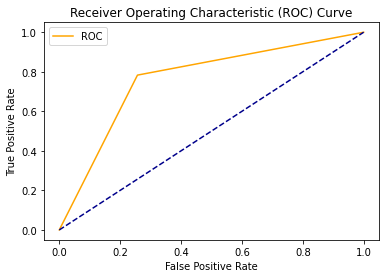

In [32]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr,tpr,threshold = metrics.roc_curve(y_predict,y_test)
plot_roc_curve(fpr,tpr)

In [33]:
#Find out coefficients of all the attributes and show the output in a data frame with column names? 
for index,value in enumerate(x_test.columns):
    coef_df.rename(columns={index:value},inplace=True)
coef_df.drop(columns='intercept',axis=1)

,CD Account
0,2.3373


In [34]:
#For test data show all the rows where the predicted class is not equal to the observed class. 
y_merge = pd.DataFrame(y_test).reset_index()
y_merge['index'] = y_merge.index
y_predict_merge = pd.DataFrame(y_predict,columns=['credit_card_predicted'])
y_predict_merge['index'] = y_predict_merge.index
pred_actual = pd.merge(y_merge,y_predict_merge,on='index',how='outer')
pred_actual = pred_actual.where(pred_actual['CreditCard'] != pred_actual['credit_card_predicted'])
pred_actual.dropna(inplace=True)
pred_actual.head()

,index,CreditCard,credit_card_predicted
0,0.0,1.0,0.0
7,7.0,1.0,0.0
9,9.0,1.0,0.0
13,13.0,1.0,0.0
22,22.0,1.0,0.0


In [35]:
#Give conclusion related to the Business understanding of your model?
#Customers with certificate of deposit account contribute the most when it comes to the taking a personal loan.  
# thus, the likelihood of customer buying a personal loan is maximum for a CD account holder